In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Q1. 원하는 변수를 2개 이상을 가지고 'price' 예측하는 모델 만들기

#### sckit-learn 활용, R^2/MSE 계산

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
X = df.loc[:,['CRIM', 'RM', 'TAX']] # 3개 데이터
y = df.loc[:,'MEDV']

X = X.values
y = y.values

In [8]:
mul_reg = LinearRegression()
mul_reg.fit(X,y)

LinearRegression()

In [9]:
y_hat = mul_reg.predict(X)

In [10]:
print('R^2: ', mul_reg.score(X, y))
print('MSE: ', mean_squared_error(y,y_hat))

R^2:  0.5716278631267326
MSE:  36.16298566450943


## Q2. (같은 독립변수를 사용) Data pre-processing 등을 활용하여 앞의 모델보다 성능 높이기(MSE 기준), 왜 성능이 높아졌는지 간단하게 서술

#### outlier 제거(그림 그려서 확인하면 쉽게 확인 가능) 의 방법 존재

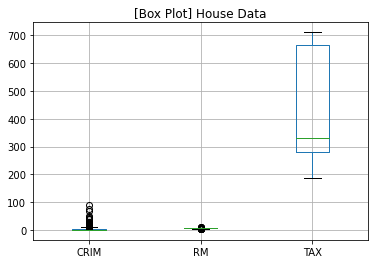

In [11]:
boxplot = df.loc[:,['CRIM', 'RM', 'TAX']].boxplot()
plt.title('[Box Plot] House Data')
plt.show()

<Figure size 432x288 with 0 Axes>

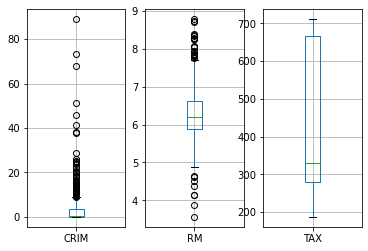

In [12]:
fig = plt.figure()

fig, ax = plt.subplots(1, 3)

boxplot = df.loc[:,['CRIM']].boxplot(ax=ax[0])
boxplot = df.loc[:,['RM']].boxplot(ax=ax[1])
boxplot = df.loc[:,['TAX']].boxplot(ax=ax[2])
plt.show()

In [13]:
data = df.loc[:,['CRIM', 'RM', 'TAX', 'MEDV']]
data

,CRIM,RM,TAX,MEDV
0,0.00632,6.575,296.0,24.0
1,0.02731,6.421,242.0,21.6
2,0.02729,7.185,242.0,34.7
3,0.03237,6.998,222.0,33.4
4,0.06905,7.147,222.0,36.2
...,...,...,...,...
501,0.06263,6.593,273.0,22.4
502,0.04527,6.120,273.0,20.6
503,0.06076,6.976,273.0,23.9
504,0.10959,6.794,273.0,22.0


### 이상치 제거

In [14]:
# 이상치인 값을 모두 제거하고 공통적인 부분만 남김
not_outlier = (data['CRIM'] < 10) & (data['RM'] > 4.8) & (data['RM'] < 7.6)
data = data.loc[not_outlier,:]

X2= data.iloc[:,:-1]
y2 = data.iloc[:,-1]

### Train 데이터와 Test 데이터를 8:2비율로 나누어 학습

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X2,
                                                    y2,
                                                    test_size=0.2,
                                                    random_state= 1229)

In [16]:
mul_reg = LinearRegression()
mul_reg.fit(X_train, y_train)

LinearRegression()

In [17]:
train_pred = mul_reg.predict(X_train)
test_pred = mul_reg.predict(X_test)

### Train set과 Test set의 MSE결과값 비교

In [18]:
mse_train = np.mean((train_pred-y_train)**2)
mse_test = np.mean((test_pred-y_test)**2)

print(mse_train)
print(mse_test)

24.217207375282044
39.050692788008305


In [19]:
def print_summary(model, X, y, features, plot= False):
    s = pd.DataFrame({'coefficients':model.coef_})
    s.index = features
    print(s)
    print()
    if plot:
        s.plot(kind= 'barh')
        plt.show()
    
    print(f'절편: {model.intercept_:.4f}')
    print(f'R^2: {model.score(X,y):.4f}')
    y_hat = model.predict(X)
    print(f'MSE: {mean_squared_error(y_hat,y):.4f}')

print("[Train_Data 결과]")
print_summary(mul_reg, X_train, y_train, features= data.columns.drop('MEDV'))
print()
print("[Test_Data 결과]")
print_summary(mul_reg, X_test, y_test, features= data.columns.drop('MEDV'))

[Train_Data 결과]
      coefficients
CRIM     -0.372971
RM        7.967338
TAX      -0.007664

절편: -23.9549
R^2: 0.4829
MSE: 24.2172

[Test_Data 결과]
      coefficients
CRIM     -0.372971
RM        7.967338
TAX      -0.007664

절편: -23.9549
R^2: 0.3855
MSE: 39.0507


## 결론
이상치를 제거하고 나서 학습했을 때  
  
Train 데이터에 의한 결과는  
R^2의 경우 0.5716에서 0.4829값으로 1에서 조금 멀어졌으나,  
MSE값은 36.1629에서 24.2172로 오차합을 12 가까이 줄일 수 있었다.  

그러나 Test 데이터에 의한 결과는
R^2의 경우 0.5716에서 0.3855값으로 1에서 멀어졌고,  
MSE값은 36.1629에서 39.0507로 오차합이 오히려 늘어났다.  

## 성능 향상의 이유..?
일반적으로 이상치를 잘 제거했다면 회귀에서 그려지는 그래프가 이상치 때문에 어긋나는 정도가 작아지게 되고,  
그래서 각각의 데이터에 대한 오차의 합이 작아지게 되기 때문에 성능이 향상되어야 한다.  
그러나 일방적으로 각 컬럼의 boxplot에 그려진 outliers를 제거하는 방법으로는 정확한 이상치를 제거했다고 볼 수 가 없다.
예를 들어, RM(방의 개수)의 경우 연령대에 따라 분포가 따로 군집을 이루고 있을 수 있고, 그런 경우 특정 연령대의 데이터가 전부 이상치로 잡혀버리게 되는 문제가 있다.  
그래서 오히려 Test 데이터에 의한 결과가 마치 Train 데이터가 오버피팅 된 것 처럼 이상치를 제거하기 전의 결과보다 좋지 않은 결과가 나온 것 같다...

### 특정한 정답은 없으며, 문제가 원하는 답변에 충족하면 만점 처리

[참고자료]   
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python  
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard